<table style="width: 100%; border-style: none;">
<tr style="border-style: none">
<td style="border-style: none; width: 1%; font-size: 16px">Institut f&uuml;r Theoretische Physik<br /> Universit&auml;t zu K&ouml;ln</td>
<td style="border-style: none; width: 1%; font-size: 16px">&nbsp;</td>
<td style="border-style: none; width: 1%; text-align: right; font-size: 16px">Prof. Dr. Simon Trebst<br />Peter Br&ouml;cker</td>
</tr>
</table>
<hr>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">Computerphysik</h1>
<h1 style="font-weight:bold; text-align: center; margin: 0px; padding:0px;">&Uuml;bungsblatt 2</h1>
<hr>
<h3 style="font-weight:bold; text-align: center; margin: 0px; padding:0px; margin-bottom: 20px;">Sommersemester 2016</h3>

**Website:** [http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml](http://www.thp.uni-koeln.de/trebst/Lectures/2016-CompPhys.shtml)

**Abgabe**: Montag, 25. April, 2016 vor der Vorlesung

**Name**: <font color="red">Michel Vielmetter</font>

**Matrikelnummer**: <font color="red">5920493</font>

<table style="border-style: none; width: 100%"><tr style="border-style: none;">
<td style="border-style: none; width: 1%; font-size: 20px; font-weight: bold">Divide and Conquer</td>
<td style="border-style: none; width: 1%; text-align: right">(4 Punkte)</td></tr></table>

Eine häufig wiederkehrende Aufgabe ist die Bestimmung von Nullstellen einer beliebigen
Funktion. Um dies zu tun, haben Sie in der Vorlesung einige iterative Verfahren kennengelernt,
die wir im Rahmen dieser Übung implementieren und vergleichen wollen. Die beiden hier behandelten Methoden zählen zum Bereich der *divide and conquer* Algorithmen, in denen wir ein Problem so lange in kleine Probleme zerlegen, bis sie irgendwann als lösbar gelten.

Als erste Methode soll eine **grid search** implementiert werden. Dazu wird ein Stück des Definitionsbereich um die Nullstelle herum in kleinere Bereiche unterteilt. Als nächstes wird der Bereich identifiziert, in dem die Nullstelle liegt und dieser wieder unterteilt. Wenn die gewünschte Präzision erreicht ist, wird das Verfahren abgebrochen.

Alternativ dazu kann ein Verfahren angewendet werden, das Sie bereits in der Mathematik als Intervallschachtelung kennengelernt haben und auch als **binary search** bekannt ist. Nachdem zwei Endpunkte gewählt wurden, wird der Bereich so halbiert, dass die Nullstelle wieder im Bereich liegt. Wie zuvor wird auch dieser Vorgang dann abgebrochen, wenn die gewünschte Genauigkeit erreicht ist.

In dieser und der nächsten Aufgabe soll eine Funktion untersucht werden, die Sie in der Quantenmechanik kennenlernen werden oder bereits kennengelernt haben. Bei der Lösung des Problems eines Teilchens in einem endlichen Potentialtopf trifft man auf die Gleichung

$\quad k\tan(ka) - \kappa = 0$

in der wir nun $a, \kappa = 1$ setzen:

In [20]:
f(k) = k .* tan(k) .- 1

f (generic function with 1 method)

### Grid Search

Als erste Methode sollen Sie den untenstehenden Code zu einer Funktion ausbauen, die eine *grid search* durchführt:

In [21]:
function grid_search(f, x_left, x_right, n_grid_points, precision)
    iterations = 100 # how many tries for better precision before giving up
    grid = linspace(x_left, x_right, n_grid_points) # grid on x-axes
    f_sign = sign(f(grid[1]))
    
    # varinit
    🏁 = 0
    f_left = 0
    f_right = 0
        
    for i in 1:iterations
        # check each pair of neighboring points on grid
        # for sign change, indicating the presence of a zero in between
        for j in 1:n_grid_points - 1 
            new_sign = sign(f(grid[j]))
            
            # check for sign_switch
            if new_sign != f_sign
                f_left = f(grid[j-1])
                f_right = f(grid[j])
                
                # lets be lucky
                if new_sign == 0
                    🏁 = grid[j]
                    f_left = f_right
                    
                # or not...
                else
                    x_left = grid[j-1]
                    x_right = grid[j]
                    🏁 = grid[j-1]+(grid[j]-grid[j-1])/2
                end
                break
            end
            f_sign = new_sign
        end
        
        # when sign was 0 f_right should be 
        # precision on x_axis
        if max(abs(f_left), abs(f_right)) < precision
            return (🏁, i)
        end
        
        # set new grid
        grid = linspace(x_left, x_right, n_grid_points)
    end
    
    return (🏁, iterations)
end

grid_search (generic function with 1 method)

Mit den folgenden Parametern ausgeführt, sollte die Ausgabe der Funktion $x_0 = 3.425$ sein.

In [22]:
grid_search(f, 2, 5, 100, 1e-3)

(3.425619834710744,2)

### Binary Search

Vervollständigen Sie nun auch das folgende Skelett, um die Nullstelle mittels *binary search* zu finden

In [23]:
function binary_search(f, x_left, x_right, precision)
    iterations = 100
    f_sign = sign(f(x_left))
    half_way(x,y) = x+(y-x)/2
    
    for i in 1:iterations
        half = half_way(x_left, x_right)
        new_sign = sign(f(half))
        if new_sign == 0
            return (half, i)
        end
        
        if f_sign == new_sign
            x_left = half
        else
            x_right = half
        end
        
        if max(abs(f(x_left)), abs(f(x_right))) < precision
            return (half_way(x_left, x_right), i)
        end
    end
    
    return (half_way(x_left, x_right), 1)
end

binary_search (generic function with 1 method)

In [24]:
binary_search(f, 2, 5, 1e-3)

(3.425567626953125,14)

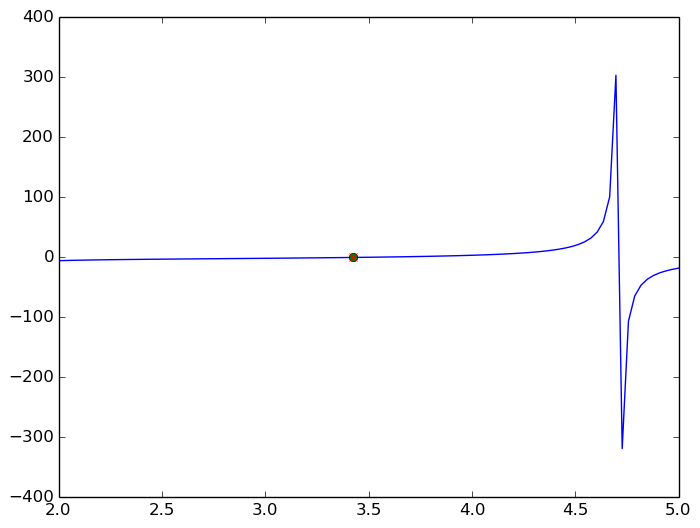

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7fbe44b78590>

In [27]:
using PyPlot
x_values = linspace(2,5,100)
f_values = f(x_values)
plot(x_values,f_values)
val = binary_search(f,2,5,1e-3)
val2 = grid_search(f,2,5,100,1e-3)
plot(val[1],f(val[1]), marker = "o")
plot(val2[1],f(val2[1]),marker = "x")